In [1]:
#Importando las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuración de gráficos
%matplotlib inline
sns.set(style="whitegrid")

In [5]:
# Cargando el dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [6]:
# Exploración inicial
print(df_train.head())
print(df_train.describe())
print(df_train.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

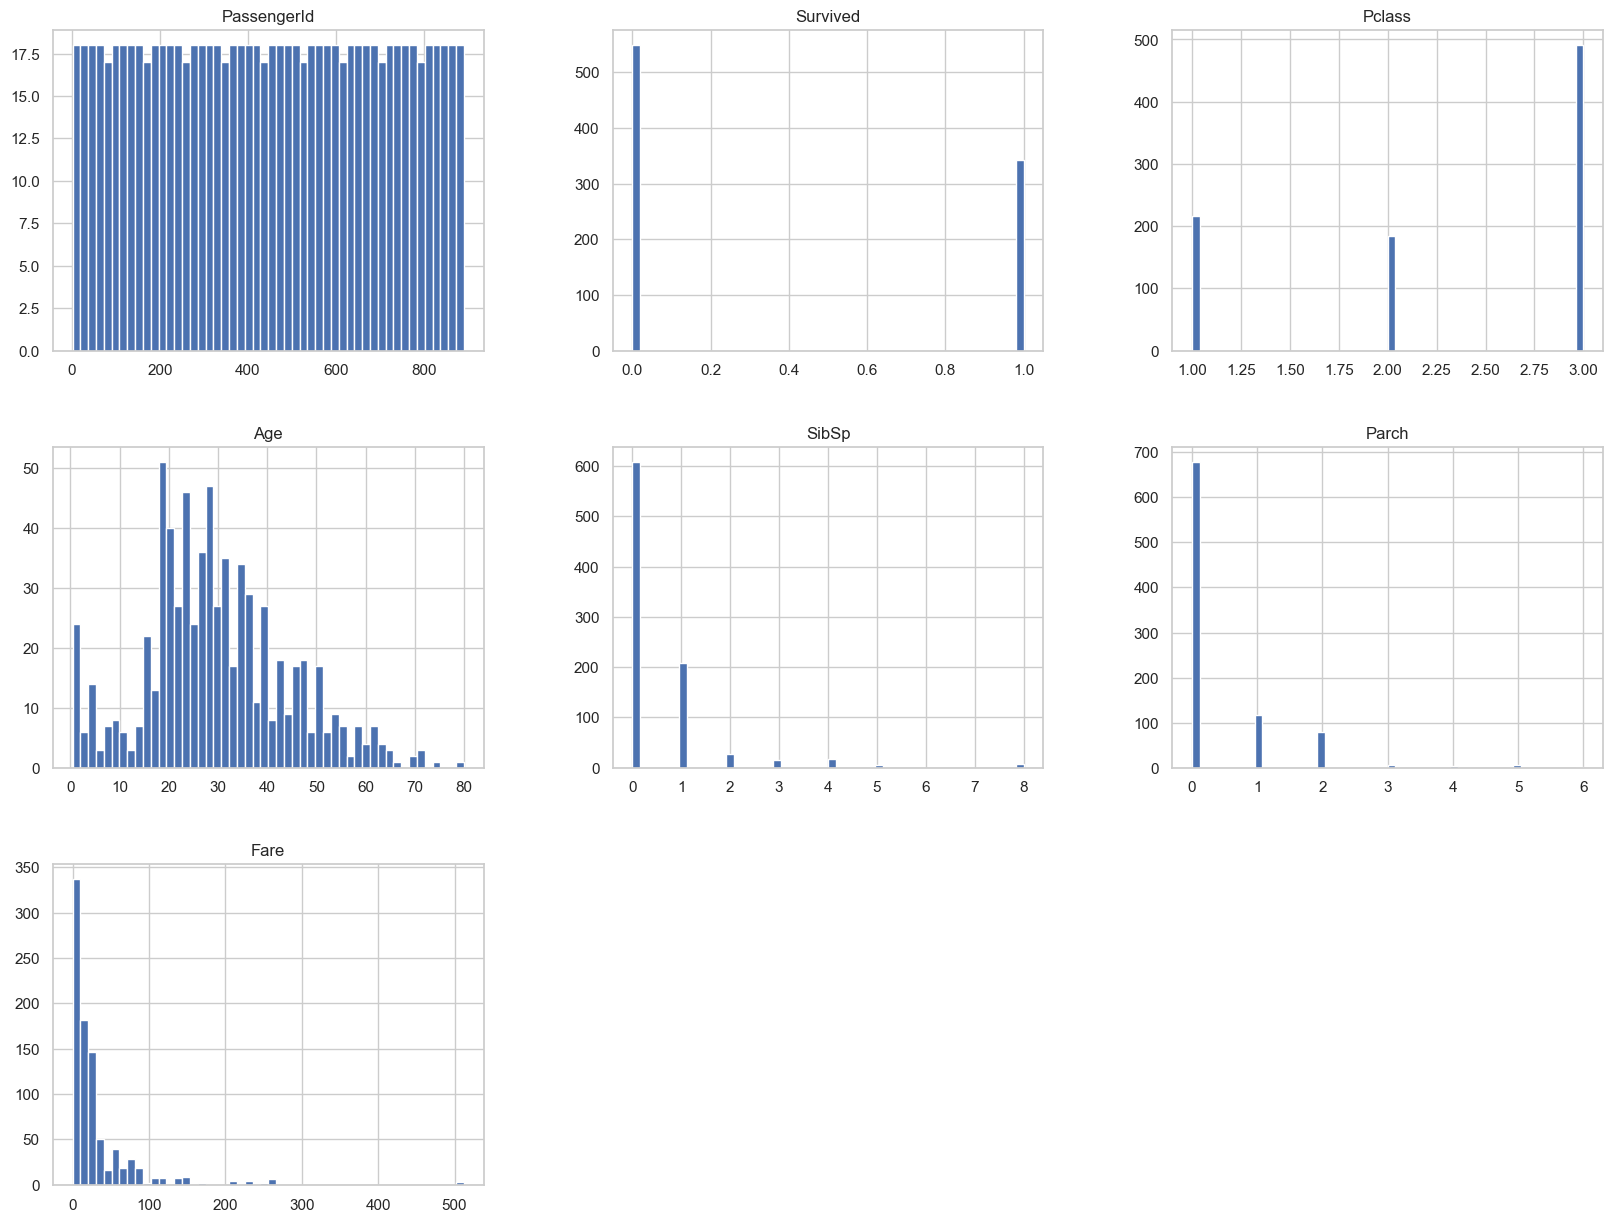

In [7]:
# Visualización de la distribución de las características
df_train.hist(bins=50, figsize=(20, 15))
plt.show()

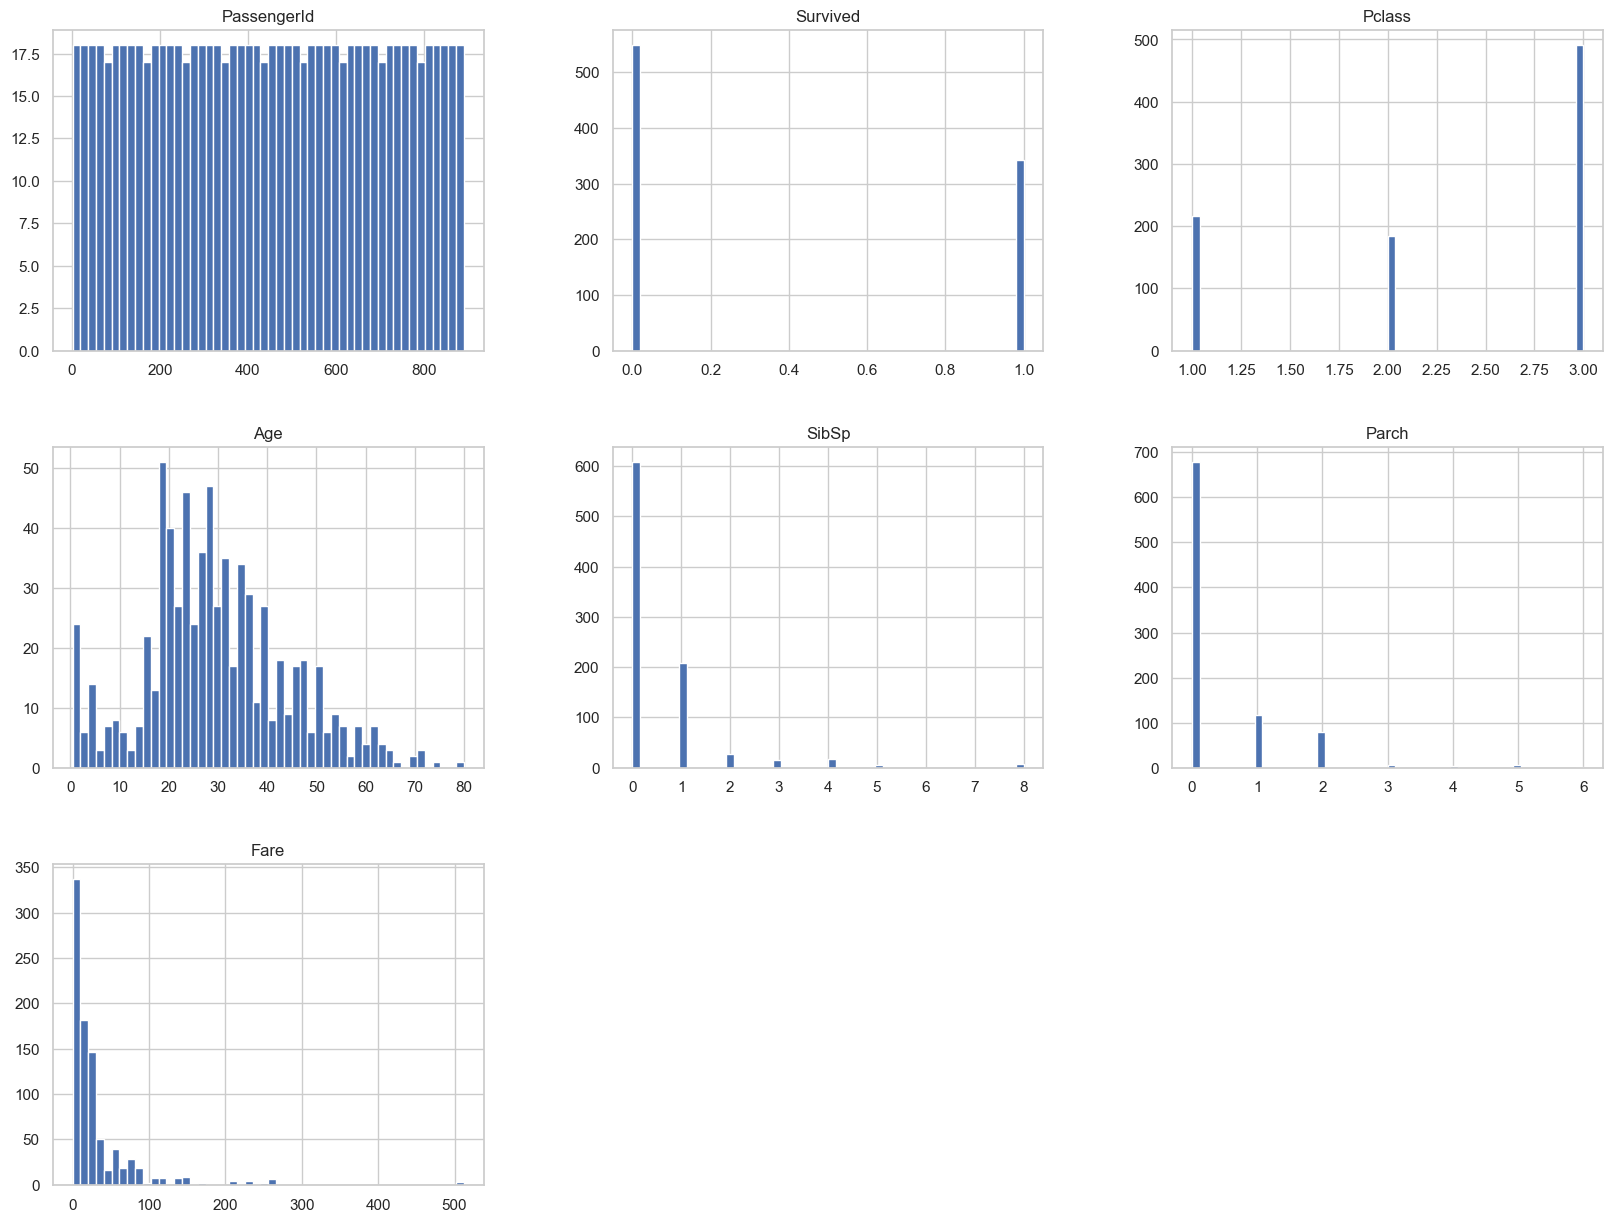

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 1200x800 with 0 Axes>

In [9]:
# Visualización de la distribución de las características
df_train.hist(bins=50, figsize=(20, 15))
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.show()

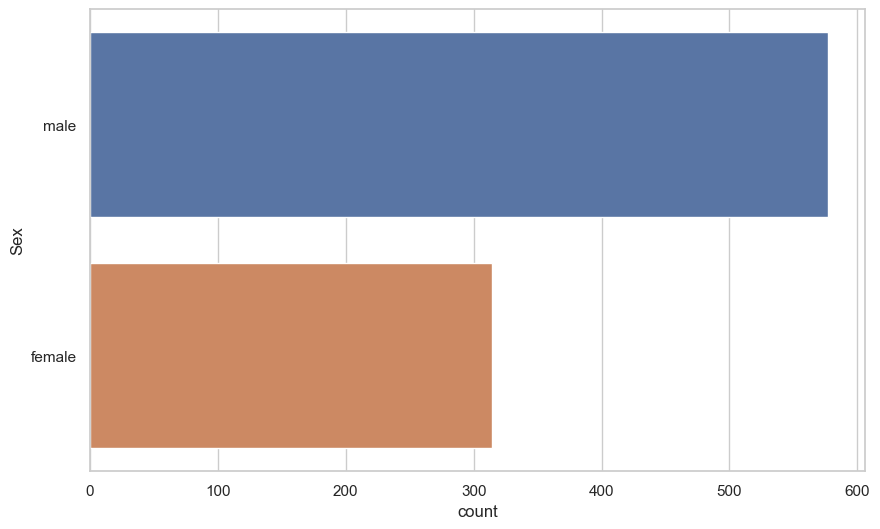

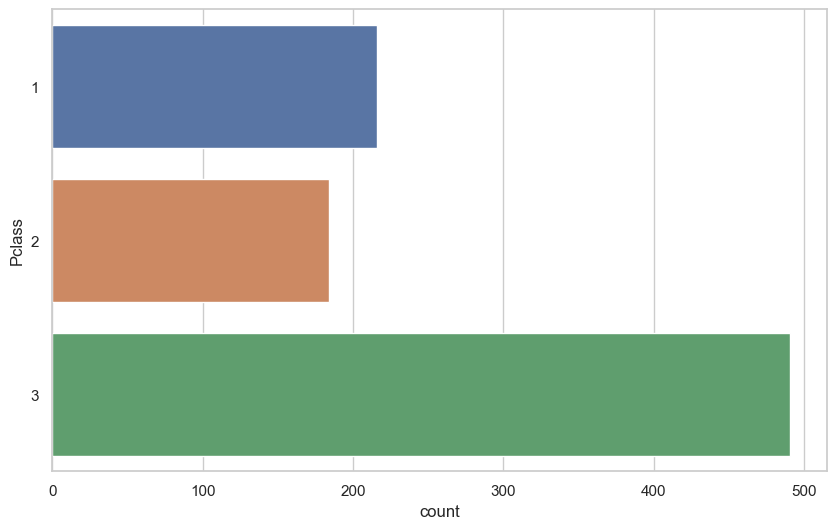

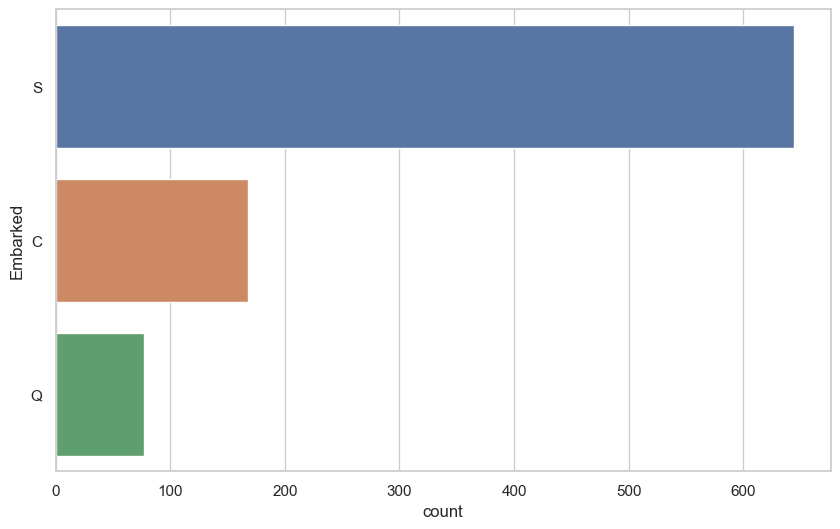

In [10]:
# Visualización de características categóricas
categorical_features = ['Sex', 'Pclass', 'Embarked']
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=df_train)
    plt.show()

In [11]:
# Detección de valores faltantes
missing_values = df_train.isnull().sum()
print(missing_values[missing_values > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


In [12]:
# Tratamiento de valores faltantes
# Edad: rellenar con la mediana
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)

# Cabin: crear una nueva columna indicando si el valor de 'Cabin' está presente o no
df_train['Cabin_present'] = df_train['Cabin'].notnull().astype(int)

# Embarked: rellenar con la moda
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

In [13]:
# Verificar nuevamente los valores faltantes
missing_values = df_train.isnull().sum()
print(missing_values[missing_values > 0])

Cabin    687
dtype: int64


In [15]:
# Tratamiento de valores faltantes
# Edad: rellenar con la mediana
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)

# Cabin: crear una nueva columna indicando si el valor de 'Cabin' está presente o no
df_train['Cabin_present'] = df_train['Cabin'].notnull().astype(int)

# Embarked: rellenar con la moda
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

In [16]:
# Verificar nuevamente los valores faltantes
missing_values = df_train.isnull().sum()
print(missing_values[missing_values > 0])

Cabin    687
dtype: int64


In [17]:
# Tratamiento de valores faltantes
# Edad: rellenar con la mediana
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)

# Cabin: crear una nueva columna indicando si el valor de 'Cabin' está presente o no
df_train['Cabin_present'] = df_train['Cabin'].notnull().astype(int)

# Eliminar la columna 'Cabin' después de crear 'Cabin_present'
df_train.drop(columns=['Cabin'], inplace=True)

# Embarked: rellenar con la moda
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

In [19]:
# Verificar nuevamente los valores faltantes
missing_values = df_train.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


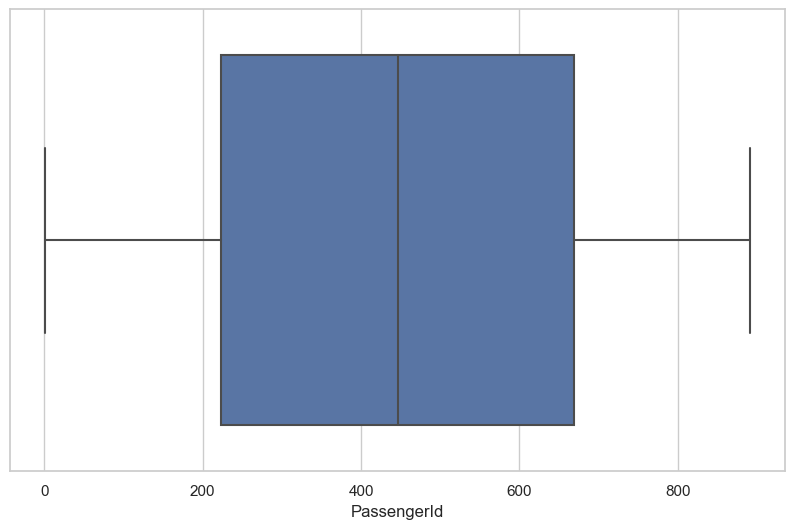

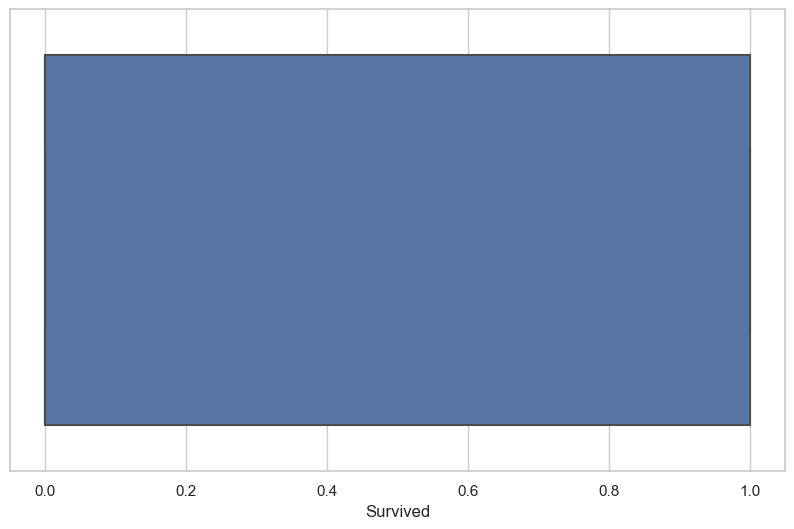

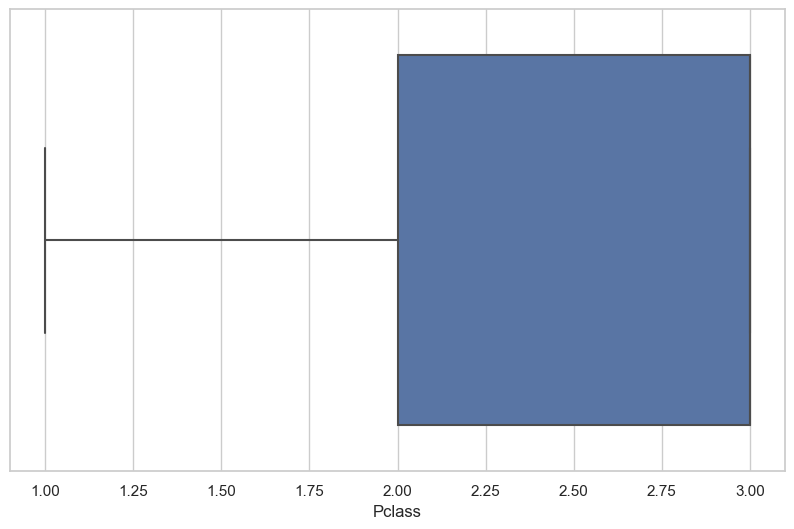

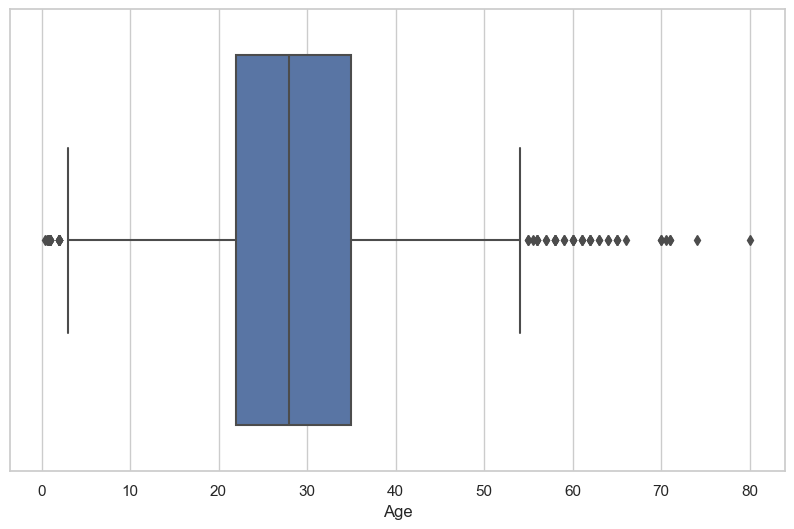

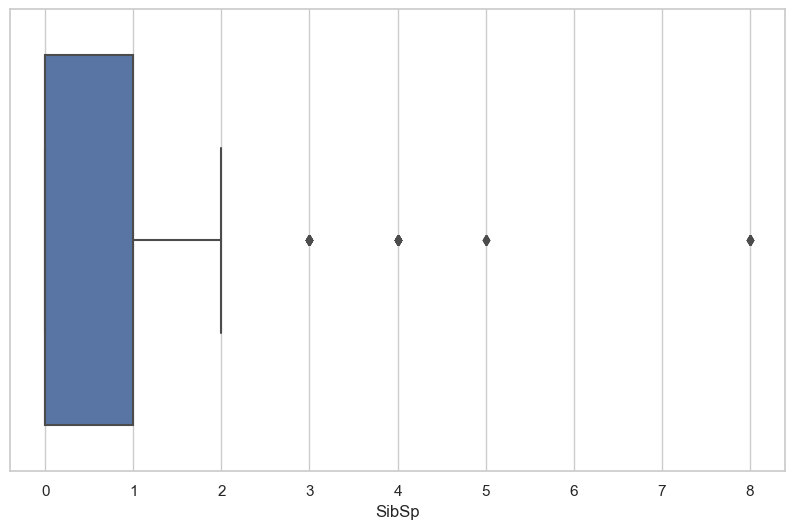

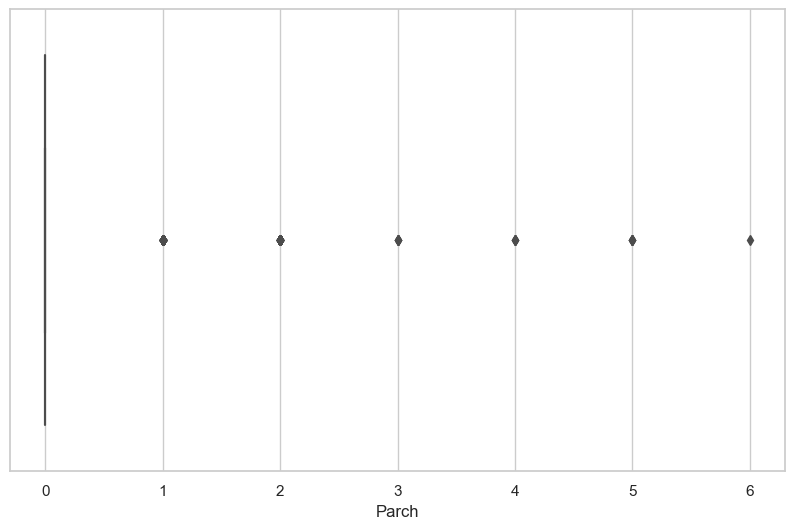

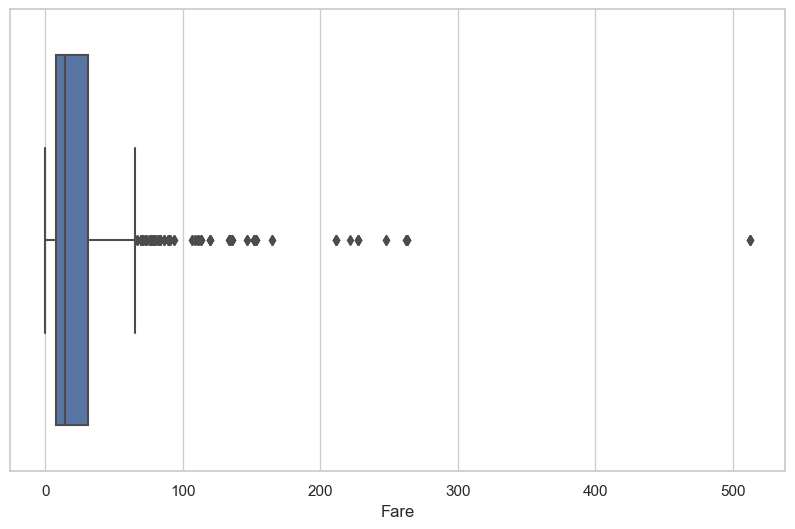

In [20]:
# Detección de valores atípicos
numeric_features = df_train.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_train[col])
    plt.show()